In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file = "all_auto_and_manual_patterns.csv"
file1 = "../RQ1/GH_labelled_combined_csv_file.csv"
file2 = "../RQ1/HF_all_labels_from_gemini.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# Exclude specific families
exclusion = list(df2['family'].unique())
dfs = df1[~df1['family'].isin(exclusion)]

# Replace 'Dispersed Alignment' with 'Disperse Alignment'
name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization',
    'Sporadic Disjoint Pattern': 'Sporadic Disjoint Synchronization'
}
dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)


GH1 = pd.read_csv(file1, encoding='latin1')
HF1 = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(dfs2['family'].unique())
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']

GH2 = GH1[~GH1['label'].isin(exclusion)]
HF2 = HF1[~HF1['label'].isin(exclusion)]

GH_main = GH2[~GH2['label'].isin(excluded_labels)]
HF_main = HF2[~HF2['label'].isin(excluded_labels)]

gf_dfs = dfs.groupby('family').agg({
    'pattern_names': lambda x: ''.join(x.unique())
}).reset_index()

GH = pd.merge(GH_main, gf_dfs, on='family', how='outer')
HF = pd.merge(HF_main, gf_dfs, on='family', how='outer')
HF

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_2072\82645948.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)
C:\Users\LabSystem\AppData\Local\Temp\ipykernel_2072\82645948.py:32: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH1 = pd.read_csv(file1, encoding='latin1')


,owner,model_name,created_at,last_updated,family,model_size,previous_size_category,downloads,likes,library_name,...,cleaned_github,title,message,commit_id,date,author,files,combined,label,pattern_names
0,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,https://github.com/01-ai/yi,Upload tokenizer.json,NaN,fa4ffba162f20948bf77c2a30eca952bf0812b7f,8/27/2024,Mia01ai,tokenizer.json,upload tokenizer.json,preprocessing,Frequent Synchronization
1,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,https://github.com/01-ai/yi,Delete tokenizer.json,NaN,c778adea4d63eb5812ee2f4bfff0f43fe1e99cde,8/27/2024,Mia01ai,tokenizer.json,delete tokenizer.json,preprocessing,Frequent Synchronization
2,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,https://github.com/01-ai/yi,Upload NOTICE,NaN,aa880dd36346295f0ef0255cd8c8e398251a0f5e,6/26/2024,Chen-01AI,NOTICE,upload notice,external documentation,Frequent Synchronization
3,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,https://github.com/01-ai/yi,Delete NOTICE,NaN,8a09fd99c176e9024ee64e319883e4da479b8bc1,6/26/2024,Chen-01AI,NOTICE,delete notice,external documentation,Frequent Synchronization
4,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,https://github.com/01-ai/yi,Upload NOTICE,NaN,3a2619d14e1cf6a9fe1792c2b96acfb4538272c7,6/26/2024,Chen-01AI,NOTICE,upload notice,external documentation,Frequent Synchronization
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17151,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,https://github.com/yitu-opensource/ConvBert,fix config,NaN,9001261c1cbfc93899a1cab9d2e9c980f65835a4,2/2/2021,abhishek,config.json,fix config,parameter tuning,Rare Disjoing pattern
17152,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,https://github.com/yitu-opensource/ConvBert,update models,NaN,3abdc6f9b0755d5260e97df36d4bfe147b0310b7,1/21/2021,abhishek,"pytorch_model.bin, tf_model.h5",update models,model structure,Rare Disjoing pattern
17153,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,https://github.com/yitu-opensource/ConvBert,fix path,NaN,64c19bcb08466f8547285d8d262ab8a723185309,1/21/2021,abhishek,config.json,fix path,preprocessing,Rare Disjoing pattern
17154,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,https://github.com/yitu-opensource/ConvBert,add convbert base,NaN,ea841915807b45fbaca73983bba97921046a5601,1/21/2021,abhishek,"config.json, pytorch_model.bin, tf_model.h5, v...",add convbert base,model structure,Rare Disjoing pattern


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file = "all_auto_and_manual_patterns.csv"
file1 = "../RQ1/GH_labelled_combined_csv_file.csv"
file2 = "../RQ1/HF_all_labels_from_gemini.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# Exclude specific families
exclusion = list(df2['family'].unique())
dfs = df1[~df1['family'].isin(exclusion)]

# Replace 'Dispersed Alignment' with 'Disperse Alignment'
name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization',
    'Sporadic Disjoint Pattern': 'Sporadic Disjoint Synchronization'
}
dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)


GH1 = pd.read_csv(file1, encoding='latin1')
HF1 = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(dfs2['family'].unique())
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']

GH2 = GH1[~GH1['label'].isin(exclusion)]
HF2 = HF1[~HF1['label'].isin(exclusion)]

GH_main = GH2[~GH2['label'].isin(excluded_labels)]
HF_main = HF2[~HF2['label'].isin(excluded_labels)]

gf_dfs = dfs.groupby('family').agg({
    'pattern_names': lambda x: ''.join(x.unique())
}).reset_index()

GH = pd.merge(GH_main, gf_dfs, on='family', how='outer')
HF = pd.merge(HF_main, gf_dfs, on='family', how='outer')

GH_prev = GH.groupby(['family', 'pattern_names', 'label']).agg({
    'commit_message': 'nunique',
    'author_username': 'nunique'
}).reset_index()


HF_prev = HF.groupby(['family', 'pattern_names', 'label']).agg({
    'combined': 'nunique',
    'author': 'nunique'
}).reset_index()

HF_prev

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_2072\8594368.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)
C:\Users\LabSystem\AppData\Local\Temp\ipykernel_2072\8594368.py:32: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH1 = pd.read_csv(file1, encoding='latin1')


,family,pattern_names,label,combined,author
0,01-ai_YI,Frequent Synchronization,add dependency,2,2
1,01-ai_YI,Frequent Synchronization,external documentation,25,12
2,01-ai_YI,Frequent Synchronization,input data,1,1
3,01-ai_YI,Frequent Synchronization,model structure,9,3
4,01-ai_YI,Frequent Synchronization,output data,2,1
...,...,...,...,...,...
1793,yahma_llama,Rare Disjoing pattern,external documentation,1,1
1794,yahma_llama,Rare Disjoing pattern,project metadata,2,1
1795,yangheng_absa-model,Disperse Synchronization,external documentation,1,1
1796,yangheng_absa-model,Disperse Synchronization,output data,1,1


<ipython-input-11-eb7548d4fe2d>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)
<ipython-input-11-eb7548d4fe2d>:36: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH1 = pd.read_csv(file1, encoding='latin1')


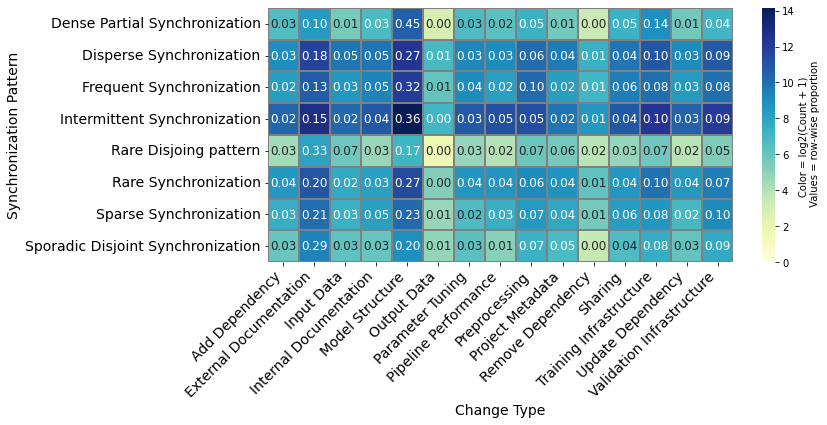

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# === Load the data ===
file = "all_auto_and_manual_patterns.csv"
file1 = "../RQ1/GH_labelled_combined_csv_file.csv"
file2 = "../RQ1/HF_all_labels_from_gemini.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# === Exclude specific families ===
exclusion = list(df2['family'].unique())
dfs = df1[~df1['family'].isin(exclusion)]

# === Clean up pattern name mappings ===
name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization',
    'Sporadic Disjoint Pattern': 'Sporadic Disjoint Synchronization'
}
dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)

# === Keep only unique (family, pattern) mappings ===
gf_dfs = dfs[['family', 'pattern_names']].drop_duplicates()

# === Load GH label data ===
GH1 = pd.read_csv(file1, encoding='latin1')

# === Exclude unwanted families and labels ===
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']
GH2 = GH1[~GH1['label'].isin(exclusion)]
GH_main = GH2[~GH2['label'].isin(excluded_labels)]

# === Merge GitHub data with pattern information ===
GH = pd.merge(GH_main, gf_dfs, on='family', how='inner')

# === Count commits per (pattern, label) ===
GH_prev = GH.groupby(['pattern_names', 'label']).agg({
    'commit_message': 'nunique',
}).reset_index().rename(columns={'commit_message': 'count'})

# === Pivot for heatmap ===
pivot_gh = GH_prev.pivot_table(index='pattern_names', columns='label', values='count', fill_value=0)

# === Normalize rows to get proportions ===
pivot_gh = GH_prev.pivot_table(index='pattern_names',
                               columns='label',
                               values='count',
                               fill_value=0)

# === Row-normalised proportions for annotations ===
pivot_gh_prop = pivot_gh.div(pivot_gh.sum(axis=1), axis=0)

# === Log₂(count + 1) for colour scale ONLY ===

pivot_gh_log = np.log2(pivot_gh + 1)

# ensure rows/cols are in the same order for both matrices
pivot_gh_prop = pivot_gh_prop.sort_index(axis=0).sort_index(axis=1)
pivot_gh_log  = pivot_gh_log.loc[pivot_gh_prop.index, pivot_gh_prop.columns]

vmax = pivot_gh_log.to_numpy().max()      # upper limit for colour bar

# --- Plot --------------------------------------------------------
num_patterns, num_labels = pivot_gh_prop.shape
fig_width  = max(12, num_labels * 0.8)
fig_height = max( 6, num_patterns * 0.6)

plt.figure(figsize=(fig_width, fig_height))
ax = sns.heatmap(
    pivot_gh_log,                    # colours = log₂(count + 1)
    vmin=0, vmax=vmax,
    cmap="YlGnBu",
    linewidths=0.1, linecolor='gray',
    annot=pivot_gh_prop.round(2),    # text = proportions
    fmt=".2f",
    cbar_kws={'label': 'Color = log2(Count + 1) \n Values = row-wise proportion'},
    #cbar_kws={'label': (r"Colour = log$_2$(count + 1) \nText = row-wise proportion")},
    annot_kws={"size": 12}
)

plt.ylabel("Synchronization Pattern", fontsize=14)
plt.xlabel("Change Type", fontsize=14)

# Rotate x-axis labels for readability
ax.set_xticklabels(
    [lbl.get_text().title() for lbl in ax.get_xticklabels()],
    rotation=45, ha='right', fontsize=14
)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig("sync_vs_change_GH.pdf", dpi=300, bbox_inches='tight')
plt.show()


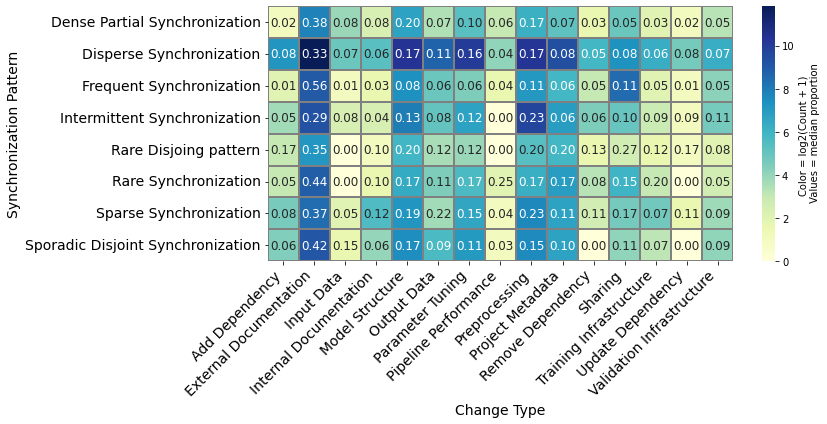

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# === Load and clean ===
file = "all_auto_and_manual_patterns.csv"
file2 = "../RQ1/HF_all_labels_from_gemini.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df_patterns = pd.read_csv(file, encoding='latin1')
df_exclude = pd.read_csv(f2, encoding='latin1')
HF_raw = pd.read_csv(file2, encoding='latin1')

# === Map patterns ===
exclusion = list(df_exclude['family'].unique())
df_patterns = df_patterns[~df_patterns['family'].isin(exclusion)]

# Normalize pattern names
name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization',
    'Sporadic Disjoint Pattern': 'Sporadic Disjoint Synchronization'
}
df_patterns['pattern_names'] = df_patterns['pattern_names'].replace(name_mapping)
pattern_map = df_patterns[['family', 'pattern_names']].drop_duplicates()

# === Preprocess HF data ===
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']
HF_filtered = HF_raw[~HF_raw['label'].isin(excluded_labels)]
HF_filtered = HF_filtered[~HF_filtered['family'].isin(exclusion)]

# Merge with pattern names
HF = pd.merge(HF_filtered, pattern_map, on='family', how='inner')

# === Step 1: calculate per-repo (i.e., model_name) label distribution ===
repo_label_counts = HF.groupby(['model_name', 'label']).size().reset_index(name='count')

# Normalize per model (row-wise)
repo_totals = repo_label_counts.groupby('model_name')['count'].transform('sum')
repo_label_counts['proportion'] = repo_label_counts['count'] / repo_totals

# Add pattern and family back in
repo_metadata = HF[['model_name', 'family', 'pattern_names']].drop_duplicates()
repo_label_counts = pd.merge(repo_label_counts, repo_metadata, on='model_name', how='left')

# === Step 2: for each pattern and label, compute the median proportion ===
pattern_label_medians = repo_label_counts.groupby(['pattern_names', 'label'])['proportion'].median().reset_index()

# Pivot median proportions for annotations
pivot_median = pattern_label_medians.pivot(index='pattern_names', columns='label', values='proportion').fillna(0)

# === Step 3: Compute log2(count + 1) on raw counts for color scale ===
# Get total counts per (pattern, label) from repo_label_counts grouped by pattern and label
pattern_label_counts = repo_label_counts.groupby(['pattern_names', 'label'])['count'].sum().reset_index()

pivot_counts = pattern_label_counts.pivot(index='pattern_names', columns='label', values='count').fillna(0)

pivot_log2 = np.log2(pivot_counts + 1)

# Align row/column order for color and annotations
pivot_log2 = pivot_log2.loc[pivot_median.index, pivot_median.columns]

vmax = pivot_log2.to_numpy().max()

# === Plot ===
num_patterns, num_labels = pivot_median.shape
fig_width = max(12, num_labels * 0.8)
fig_height = max(6, num_patterns * 0.6)

plt.figure(figsize=(fig_width, fig_height))
ax = sns.heatmap(
    pivot_log2,
    vmin=0,
    vmax=vmax,
    cmap="YlGnBu",
    linewidths=0.1,
    linecolor='gray',
    annot=pivot_median.round(2),  # show median proportions as text
    fmt=".2f",
    #cbar_kws={'label': 'Color = log2(Count + 1)\nText = Median Proportion'},
    cbar_kws={'label': 'Color = log2(Count + 1) \n Values = median proportion'},
    annot_kws={"size": 12}
)

plt.ylabel("Synchronization Pattern", fontsize=14)
plt.xlabel("Change Type", fontsize=14)

labels = [label.get_text().title() for label in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig("sync_vs_change_HF.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [18]:
import pandas as pd

# === Load preprocessed GitHub and Hugging Face proportion data ===
# Assumes these are the already-normalized (row-wise) pivot tables you computed earlier:
# pivot_gh_prop and pivot_hf_median (i.e., the median HF proportions per pattern/label)

# Rename Hugging Face table for clarity
pivot_hf_prop = pivot_median.copy()  # make sure this is your HF median proportion pivot
pivot_hf_prop.name = 'Hugging Face'

# GitHub table (proportion of commits per pattern)
pivot_gh_prop.name = 'GitHub'

# === Melt both tables ===
gh_melted = pivot_gh_prop.reset_index().melt(id_vars='pattern_names', var_name='label', value_name='gh_prop')
hf_melted = pivot_hf_prop.reset_index().melt(id_vars='pattern_names', var_name='label', value_name='hf_prop')

# === Merge both ===
merged = pd.merge(gh_melted, hf_melted, on=['pattern_names', 'label'], how='outer').fillna(0)

# === Compute absolute difference and dominant platform ===
merged['abs_diff'] = (merged['gh_prop'] - merged['hf_prop']).abs()
merged['dominant_platform'] = merged.apply(
    lambda row: 'GitHub' if row['gh_prop'] > row['hf_prop'] else ('Hugging Face' if row['hf_prop'] > row['gh_prop'] else 'Equal'),
    axis=1
)

# === Sort for readability ===
merged = merged.sort_values(by=['pattern_names', 'abs_diff'], ascending=[True, False])

# === Optional: Save result to CSV ===
merged.to_csv("change_type_dominance_by_pattern.csv", index=False)

# === Preview top rows ===
merged.head(20)


,pattern_names,label,gh_prop,hf_prop,abs_diff,dominant_platform
8,Dense Partial Synchronization,external documentation,0.100671,0.384615,0.283944,Hugging Face
32,Dense Partial Synchronization,model structure,0.450275,0.200000,0.250275,GitHub
64,Dense Partial Synchronization,preprocessing,0.049420,0.166667,0.117246,Hugging Face
96,Dense Partial Synchronization,training infrastructure,0.144600,0.030303,0.114297,GitHub
40,Dense Partial Synchronization,output data,0.001830,0.074026,0.072196,Hugging Face
48,Dense Partial Synchronization,parameter tuning,0.032337,0.100000,0.067663,Hugging Face
16,Dense Partial Synchronization,input data,0.014033,0.076149,0.062116,Hugging Face
72,Dense Partial Synchronization,project metadata,0.014948,0.066667,0.051719,Hugging Face
24,Dense Partial Synchronization,internal documentation,0.032642,0.076923,0.044281,Hugging Face
56,Dense Partial Synchronization,pipeline performance,0.023795,0.061111,0.037316,Hugging Face


In [25]:
import pandas as pd
from scipy.stats import chi2_contingency

GH_prev = GH.groupby(['pattern_names', 'label']).agg({
    'commit_message': 'nunique',
}).reset_index().rename(columns={'commit_message': 'count'})

pivot_gh = GH_prev.pivot_table(index='pattern_names', columns='label', values='count', fill_value=0)

pattern_label_medians = repo_label_counts.groupby(['pattern_names', 'label'])['proportion'].median().reset_index()
pivot_median = pattern_label_medians.pivot(index='pattern_names', columns='label', values='proportion').fillna(0)

HF_counts = HF.groupby(['pattern_names', 'label']).agg({
    'combined': 'nunique'  # or 'count' if 'commit_message' unavailable
}).reset_index().rename(columns={'combined': 'count'})

pivot_hf = HF_counts.pivot_table(index='pattern_names', columns='label', values='count', fill_value=0)

def chi_square_test_change_type(pivot_gh, pivot_hf):
    change_types = set(pivot_gh.columns).intersection(pivot_hf.columns)
    patterns = set(pivot_gh.index).union(pivot_hf.index)
    
    results = []
    
    for change in change_types:
        gh_counts = pivot_gh[change].reindex(patterns, fill_value=0)
        hf_counts = pivot_hf[change].reindex(patterns, fill_value=0)
        
        contingency = pd.DataFrame({
            'GitHub': gh_counts,
            'HuggingFace': hf_counts
        }).T
        
        chi2, p, dof, expected = chi2_contingency(contingency)
        
        results.append({
            'change_type': change,
            'chi2_statistic': chi2,
            'p_value': p,
            'degrees_of_freedom': dof,
            'significant_at_0.05': p < 0.05
        })
    
    return pd.DataFrame(results).sort_values('p_value')

# Run test
results_df = chi_square_test_change_type(pivot_gh, pivot_hf)
results_df

,change_type,chi2_statistic,p_value,degrees_of_freedom,significant_at_0.05
9,model structure,1820.054897,0.000000e+00,7,True
6,external documentation,952.950821,1.758585e-201,7,True
1,preprocessing,762.355328,2.458876e-160,7,True
5,parameter tuning,300.261282,5.320248e-61,7,True
0,output data,208.600794,1.727768e-41,7,True
7,training infrastructure,182.827210,4.925326e-36,7,True
10,validation infrastructure,168.289428,5.758982e-33,7,True
11,sharing,156.378949,1.853384e-30,7,True
14,project metadata,149.928011,4.203696e-29,7,True
2,internal documentation,102.751352,2.913224e-19,7,True


In [26]:
pivot_hf

label,add dependency,external documentation,input data,internal documentation,model structure,output data,parameter tuning,pipeline performance,preprocessing,project metadata,remove dependency,sharing,training infrastructure,update dependency,validation infrastructure
pattern_names,,,,,,,,,,,,,,,
Dense Partial Synchronization,1.0,72.0,5.0,2.0,60.0,10.0,21.0,3.0,50.0,17.0,2.0,9.0,3.0,1.0,7.0
Disperse Synchronization,22.0,553.0,26.0,15.0,530.0,298.0,96.0,13.0,269.0,81.0,20.0,65.0,45.0,10.0,72.0
Frequent Synchronization,3.0,117.0,1.0,1.0,56.0,24.0,12.0,2.0,38.0,15.0,3.0,100.0,3.0,1.0,12.0
Intermittent Synchronization,3.0,99.0,4.0,2.0,104.0,21.0,17.0,0.0,42.0,6.0,12.0,17.0,6.0,1.0,19.0
Rare Disjoing pattern,2.0,24.0,0.0,1.0,32.0,5.0,4.0,0.0,18.0,11.0,2.0,3.0,2.0,1.0,3.0
Rare Synchronization,4.0,69.0,0.0,2.0,39.0,9.0,10.0,1.0,26.0,19.0,9.0,28.0,7.0,0.0,5.0
Sparse Synchronization,2.0,80.0,3.0,5.0,64.0,6.0,12.0,1.0,33.0,17.0,5.0,22.0,21.0,2.0,5.0
Sporadic Disjoint Synchronization,4.0,129.0,2.0,7.0,90.0,29.0,23.0,1.0,97.0,21.0,0.0,8.0,7.0,0.0,14.0


In [27]:
pivot_gh

label,add dependency,external documentation,input data,internal documentation,model structure,output data,parameter tuning,pipeline performance,preprocessing,project metadata,remove dependency,sharing,training infrastructure,update dependency,validation infrastructure
pattern_names,,,,,,,,,,,,,,,
Dense Partial Synchronization,96.0,330.0,46.0,107.0,1476.0,6.0,106.0,78.0,162.0,49.0,10.0,155.0,474.0,49.0,134.0
Disperse Synchronization,495.0,3370.0,862.0,902.0,5070.0,118.0,562.0,507.0,1134.0,762.0,165.0,849.0,1931.0,534.0,1703.0
Frequent Synchronization,290.0,1619.0,374.0,641.0,4006.0,67.0,496.0,279.0,1186.0,296.0,130.0,705.0,1018.0,343.0,1001.0
Intermittent Synchronization,1247.0,7385.0,1210.0,1879.0,18233.0,130.0,1733.0,2281.0,2448.0,909.0,366.0,1807.0,5175.0,1408.0,4404.0
Rare Disjoing pattern,21.0,265.0,54.0,25.0,138.0,2.0,27.0,15.0,58.0,47.0,14.0,27.0,54.0,14.0,39.0
Rare Synchronization,377.0,1920.0,205.0,287.0,2614.0,37.0,391.0,381.0,545.0,418.0,72.0,370.0,917.0,357.0,720.0
Sparse Synchronization,179.0,1093.0,160.0,279.0,1184.0,26.0,102.0,170.0,338.0,213.0,48.0,316.0,385.0,121.0,518.0
Sporadic Disjoint Synchronization,61.0,671.0,73.0,62.0,467.0,28.0,75.0,33.0,161.0,109.0,11.0,100.0,183.0,66.0,206.0


In [8]:
import pandas as pd
from scipy.stats import chi2_contingency

# === Load all files ===
df_patterns = pd.read_csv("all_auto_and_manual_patterns.csv", encoding='latin1')
GH_raw = pd.read_csv("../RQ1/GH_labelled_combined_csv_file.csv", encoding='latin1')
HF_raw = pd.read_csv("../RQ1/HF_all_labels_from_gemini.csv", encoding='latin1')
df_exclude = pd.read_csv("../RQ1/must_exclude_from_all_analysis.csv", encoding='latin1')

# === Pattern cleaning and filtering ===
excluded_families = list(df_exclude['family'].unique())
df_patterns = df_patterns[~df_patterns['family'].isin(excluded_families)]

name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization',
    'Sporadic Disjoint Pattern': 'Sporadic Disjoint Synchronization'
}
df_patterns['pattern_names'] = df_patterns['pattern_names'].replace(name_mapping)

# === Create pattern mapping ===
pattern_map = df_patterns[['family', 'pattern_names']].drop_duplicates()

# === Clean GitHub and HF data ===
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']
GH_filtered = GH_raw[
    ~GH_raw['family'].isin(excluded_families) &
    ~GH_raw['label'].isin(excluded_labels)
]
HF_filtered = HF_raw[
    ~HF_raw['family'].isin(excluded_families) &
    ~HF_raw['label'].isin(excluded_labels)
]

# === Merge to get pattern names ===
GH = pd.merge(GH_filtered, pattern_map, on='family', how='inner')
HF = pd.merge(HF_filtered, pattern_map, on='family', how='inner')

# === GH: Count commits per pattern and label ===
gh_counts = GH.groupby(['pattern_names', 'label']).agg({
    'commit_message': 'nunique'
}).reset_index().rename(columns={'commit_message': 'count'})

pivot_gh = gh_counts.pivot(index='pattern_names', columns='label', values='count').fillna(0)

# === HF: Count occurrences per pattern and label ===
hf_counts = HF.groupby(['pattern_names', 'label']).size().reset_index(name='count')
pivot_hf = hf_counts.pivot(index='pattern_names', columns='label', values='count').fillna(0)

# === Chi-Square Test per Pattern ===
def chi_square_by_pattern(pivot_gh, pivot_hf):
    common_patterns = sorted(set(pivot_gh.index).intersection(pivot_hf.index))
    common_labels = sorted(set(pivot_gh.columns).intersection(pivot_hf.columns))

    results = []

    for pattern in common_patterns:
        gh_row = pivot_gh.loc[pattern, common_labels]
        hf_row = pivot_hf.loc[pattern, common_labels]

        contingency = pd.DataFrame([gh_row, hf_row], index=['GitHub', 'Hugging Face'])
        chi2, p, dof, _ = chi2_contingency(contingency)

        results.append({
            'pattern': pattern,
            'chi2_statistic': chi2,
            'p_value': p,
            'degrees_of_freedom': dof,
            'significant_at_0.05': p < 0.05
        })

    return pd.DataFrame(results).sort_values('p_value')

# === Run the test ===
pattern_results_df = chi_square_by_pattern(pivot_gh, pivot_hf)
pattern_results_df


<ipython-input-8-b4250a491544>:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH_raw = pd.read_csv("../RQ1/GH_labelled_combined_csv_file.csv", encoding='latin1')


,pattern,chi2_statistic,p_value,degrees_of_freedom,significant_at_0.05
1,Disperse Synchronization,6191.223518,0.000000e+00,14,True
2,Frequent Synchronization,1806.128000,0.000000e+00,14,True
3,Intermittent Synchronization,5612.080104,0.000000e+00,14,True
5,Rare Synchronization,940.468599,9.161296e-192,14,True
6,Sparse Synchronization,664.606346,9.169145e-133,14,True
0,Dense Partial Synchronization,663.620414,1.487869e-132,14,True
7,Sporadic Disjoint Synchronization,521.398419,2.687509e-102,14,True
4,Rare Disjoing pattern,135.747051,4.958047e-22,14,True


In [7]:
import pandas as pd
from scipy.stats import chi2_contingency

# === Load all files ===
df_patterns = pd.read_csv("all_auto_and_manual_patterns.csv", encoding='latin1')
GH_raw = pd.read_csv("../RQ1/GH_labelled_combined_csv_file.csv", encoding='latin1')
HF_raw = pd.read_csv("../RQ1/HF_all_labels_from_gemini.csv", encoding='latin1')
df_exclude = pd.read_csv("../RQ1/must_exclude_from_all_analysis.csv", encoding='latin1')

# === Pattern cleaning and filtering ===
excluded_families = list(df_exclude['family'].unique())
df_patterns = df_patterns[~df_patterns['family'].isin(excluded_families)]

name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization',
    'Sporadic Disjoint Pattern': 'Sporadic Disjoint Synchronization'
}
df_patterns['pattern_names'] = df_patterns['pattern_names'].replace(name_mapping)

# === Create pattern mapping ===
pattern_map = df_patterns[['family', 'pattern_names']].drop_duplicates()

# === Clean GitHub and HF data ===
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']
GH_filtered = GH_raw[
    ~GH_raw['family'].isin(excluded_families) & 
    ~GH_raw['label'].isin(excluded_labels)
]
HF_filtered = HF_raw[
    ~HF_raw['family'].isin(excluded_families) & 
    ~HF_raw['label'].isin(excluded_labels)
]

# === Merge to get pattern names ===
GH = pd.merge(GH_filtered, pattern_map, on='family', how='inner')
HF = pd.merge(HF_filtered, pattern_map, on='family', how='inner')

# === GH: Count commits per pattern and label ===
gh_counts = GH.groupby(['pattern_names', 'label']).agg({
    'commit_message': 'nunique'
}).reset_index().rename(columns={'commit_message': 'count'})

pivot_gh = gh_counts.pivot(index='pattern_names', columns='label', values='count').fillna(0)

# === HF: Count occurrences per pattern and label ===
hf_counts = HF.groupby(['pattern_names', 'label']).size().reset_index(name='count')
pivot_hf = hf_counts.pivot(index='pattern_names', columns='label', values='count').fillna(0)

# === Chi-Square Test with Expected Frequency Output ===
def chi_square_by_pattern_with_expected(pivot_gh, pivot_hf):
    common_patterns = sorted(set(pivot_gh.index).intersection(pivot_hf.index))
    common_labels = sorted(set(pivot_gh.columns).intersection(pivot_hf.columns))

    results = []

    for pattern in common_patterns:
        gh_row = pivot_gh.loc[pattern, common_labels]
        hf_row = pivot_hf.loc[pattern, common_labels]

        contingency = pd.DataFrame([gh_row, hf_row], index=['GitHub', 'Hugging Face'])

        chi2, p, dof, expected = chi2_contingency(contingency)

        # Print expected frequency table
        expected_df = pd.DataFrame(expected, index=['GitHub', 'Hugging Face'], columns=common_labels)
        print(f"\n=== Expected Frequencies for Pattern: {pattern} ===")
        print(expected_df.round(2))

        # Check how many expected values are < 5
        low_expected = (expected < 5).sum()
        low_expected_total = (expected < 5).sum().sum()

        results.append({
            'pattern': pattern,
            'chi2_statistic': chi2,
            'p_value': p,
            'degrees_of_freedom': dof,
            'significant_at_0.05': p < 0.05,
            'min_expected_value': expected.min(),
            'cells_below_5': low_expected_total
        })

    return pd.DataFrame(results).sort_values('p_value')

# Run and print results
results_df = chi_square_by_pattern_with_expected(pivot_gh, pivot_hf)

print("\n=== Summary of Chi-Square Test Results ===")
results_df


<ipython-input-7-df7bb3ea01c0>:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH_raw = pd.read_csv("../RQ1/GH_labelled_combined_csv_file.csv", encoding='latin1')



=== Expected Frequencies for Pattern: Dense Partial Synchronization ===
              add dependency  external documentation  input data  \
GitHub                 82.89                  477.69       51.27   
Hugging Face           14.11                   81.31        8.73   

              internal documentation  model structure  output data  \
GitHub                         94.85          1349.31        13.67   
Hugging Face                   16.15           229.69         2.33   

              parameter tuning  pipeline performance  preprocessing  \
GitHub                  123.91                 72.64         199.11   
Hugging Face             21.09                 12.36          33.89   

              project metadata  remove dependency  sharing  \
GitHub                   72.64              10.25   157.23   
Hugging Face             12.36               1.75    26.77   

              training infrastructure  update dependency  \
GitHub                         407.61             

,pattern,chi2_statistic,p_value,degrees_of_freedom,significant_at_0.05,min_expected_value,cells_below_5
1,Disperse Synchronization,6191.223518,0.000000e+00,14,True,70.604430,0
2,Frequent Synchronization,1806.128000,0.000000e+00,14,True,9.107299,0
3,Intermittent Synchronization,5612.080104,0.000000e+00,14,True,6.288156,0
5,Rare Synchronization,940.468599,9.161296e-192,14,True,5.006560,0
6,Sparse Synchronization,664.606346,9.169145e-133,14,True,6.408229,0
0,Dense Partial Synchronization,663.620414,1.487869e-132,14,True,1.745568,2
7,Sporadic Disjoint Synchronization,521.398419,2.687509e-102,14,True,3.918481,1
4,Rare Disjoing pattern,135.747051,4.958047e-22,14,True,3.877193,4


In [34]:
common_patterns = sorted(set(pivot_gh.index).intersection(set(pivot_hf.index)))
common_labels = sorted(set(pivot_gh.columns).intersection(set(pivot_hf.columns)))

dominant_changes = []

for pattern in common_patterns:
    gh_row = pivot_gh.loc[pattern, common_labels].fillna(0)
    hf_row = pivot_hf.loc[pattern, common_labels].fillna(0)

    for label in common_labels:
        gh_val = gh_row[label]
        hf_val = hf_row[label]

        abs_diff = abs(gh_val - hf_val)
        dominant = 'GitHub' if gh_val > hf_val else ('Hugging Face' if hf_val > gh_val else 'Equal')

        dominant_changes.append({
            'pattern': pattern,
            'change_type': label,
            'GitHub_count': gh_val,
            'HF_count': hf_val,
            'abs_diff': abs_diff,
            'dominant_platform': dominant
        })

# Convert to DataFrame
dominance_df = pd.DataFrame(dominant_changes)

# Optionally: get top 3 contributors per pattern
top_dominant_per_pattern = (
    dominance_df.sort_values(['pattern', 'abs_diff'], ascending=[True, False])
    .groupby('pattern')
    .head(3)
)

#top_dominant_per_pattern.to_csv("dominant_change_types_by_pattern.csv", index=False)
top_dominant_per_pattern

,pattern,change_type,GitHub_count,HF_count,abs_diff,dominant_platform
4,Dense Partial Synchronization,model structure,1476.0,60.0,1416.0,GitHub
12,Dense Partial Synchronization,training infrastructure,474.0,3.0,471.0,GitHub
1,Dense Partial Synchronization,external documentation,330.0,72.0,258.0,GitHub
19,Disperse Synchronization,model structure,5070.0,530.0,4540.0,GitHub
16,Disperse Synchronization,external documentation,3370.0,553.0,2817.0,GitHub
27,Disperse Synchronization,training infrastructure,1931.0,45.0,1886.0,GitHub
34,Frequent Synchronization,model structure,4006.0,56.0,3950.0,GitHub
31,Frequent Synchronization,external documentation,1619.0,117.0,1502.0,GitHub
38,Frequent Synchronization,preprocessing,1186.0,38.0,1148.0,GitHub
49,Intermittent Synchronization,model structure,18233.0,104.0,18129.0,GitHub


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# === Load and clean ===
file = "all_auto_and_manual_patterns.csv"
file2 = "../RQ1/HF_all_labels_from_gemini.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df_patterns = pd.read_csv(file, encoding='latin1')
df_exclude = pd.read_csv(f2, encoding='latin1')
HF_raw = pd.read_csv(file2, encoding='latin1')

# === Map patterns ===
exclusion = list(df_exclude['family'].unique())
df_patterns = df_patterns[~df_patterns['family'].isin(exclusion)]

# Normalize pattern names
name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization',
    'Sporadic Disjoint Pattern': 'Sporadic Disjoint Synchronization'
}
df_patterns['pattern_names'] = df_patterns['pattern_names'].replace(name_mapping)
pattern_map = df_patterns[['family', 'pattern_names']].drop_duplicates()

# === Preprocess HF data ===
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']
HF_filtered = HF_raw[~HF_raw['label'].isin(excluded_labels)]
HF_filtered = HF_filtered[~HF_filtered['family'].isin(exclusion)]

# Merge with pattern names
HF = pd.merge(HF_filtered, pattern_map, on='family', how='inner')

# === Step 1: calculate per-repo (i.e., model_id) label distribution ===
repo_label_counts = HF.groupby(['model_name', 'label']).size().reset_index(name='count')

# Normalize per model (row-wise)
repo_totals = repo_label_counts.groupby('model_name')['count'].transform('sum')
repo_label_counts['proportion'] = repo_label_counts['count'] / repo_totals

# Add pattern and family back in
repo_metadata = HF[['model_name', 'family', 'pattern_names']].drop_duplicates()
repo_label_counts = pd.merge(repo_label_counts, repo_metadata, on='model_name', how='left')

# === Step 2: for each pattern and label, compute the median proportion ===
pattern_label_medians = repo_label_counts.groupby(['pattern_names', 'label'])['proportion'].median().reset_index()

# Pivot for heatmap
pivot_median = pattern_label_medians.pivot(index='pattern_names', columns='label', values='proportion').fillna(0)

log_pivot = np.log10(pivot_median + 1e-4)

# === Plot ===
num_patterns = log_pivot.shape[0]
num_labels = log_pivot.shape[1]

fig_width = max(12, num_labels * 0.8)
fig_height = max(6, num_patterns * 0.6)

plt.figure(figsize=(fig_width, fig_height))
ax = sns.heatmap(
    log_pivot,
    annot=pivot_median,  # show original proportions
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.1,
    linecolor='gray',
    cbar_kws={'label': 'log10(Proportion + 1e-4)'},
    annot_kws={"size": 12}
)

#plt.title("Hugging Face: Median Proportion of Change Types by Synchronization Pattern (Log Scale)", fontsize=14)
plt.ylabel("Synchronization Pattern", fontsize=14)
plt.xlabel("Change Type", fontsize=14)

labels = [label.get_text().title() for label in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig("sync_vs_change_HF.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Load the data ===
file = "all_auto_and_manual_patterns.csv"
file1 = "../RQ1/GH_labelled_combined_csv_file.csv"
file2 = "../RQ1/HF_all_labels_from_gemini.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# === Exclude specific families ===
exclusion = list(df2['family'].unique())
dfs = df1[~df1['family'].isin(exclusion)]

# === Clean up pattern name mappings ===
name_mapping = {
    'Dense Alignment Patter': 'Dense Synchronization',
    'Frequent Alignment Pattern': 'Frequent Synchronization',
    'Intermittent Alignment Pattern': 'Intermittent Synchronization',
    'Rare Alignment Pattern': 'Rare Synchronization',
    'Sparse Alignment Pattern': 'Sparse Synchronization',
    'Dispersed Alignment Pattern': 'Disperse Synchronization',
    'Dense Partial Alignment Pattern': 'Dense Partial Synchronization',
    'Sporadic Disjoint Pattern': 'Sporadic Disjoint Synchronization'
}
dfs['pattern_names'] = dfs['pattern_names'].replace(name_mapping)

# === Keep only unique (family, pattern) mappings ===
gf_dfs = dfs[['family', 'pattern_names']].drop_duplicates()

# === Load GH label data ===
GH1 = pd.read_csv(file1, encoding='latin1')

# === Exclude unwanted families and labels ===
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']
GH2 = GH1[~GH1['label'].isin(exclusion)]
GH_main = GH2[~GH2['label'].isin(excluded_labels)]

# === Merge GitHub data with pattern information ===
GH = pd.merge(GH_main, gf_dfs, on='family', how='inner')

# === Count commits per (pattern, label) ===
GH_prev = GH.groupby(['pattern_names', 'label']).agg({
    'commit_message': 'nunique',
}).reset_index().rename(columns={'commit_message': 'count'})

# === Pivot for heatmap ===
pivot_gh = GH_prev.pivot_table(index='pattern_names', columns='label', values='count', fill_value=0)

# === Normalize rows to get proportions ===
pivot_gh_prop = pivot_gh.div(pivot_gh.sum(axis=1), axis=0)


pivot_gh_prop = pivot_gh_prop.sort_index(axis=0).sort_index(axis=1)

# Adjust figure size dynamically based on number of columns/labels
num_patterns = pivot_gh_prop.shape[0]
num_labels = pivot_gh_prop.shape[1]

# Use larger figure for readability
fig_width = max(12, num_labels * 0.8)
fig_height = max(6, num_patterns * 0.6)

plt.figure(figsize=(fig_width, fig_height))
ax = sns.heatmap(
    pivot_gh_prop,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.1,
    linecolor='gray',
    cbar_kws={'label': 'Proportion'},
    annot_kws={"size": 12}
)

#plt.title("GitHub: Proportion of Change Types by Synchronization Pattern", fontsize=14)
plt.ylabel("Synchronization Pattern", fontsize=14)
plt.xlabel("Change Type", fontsize=14)

# Rotate x-axis labels for better readability

labels = [label.get_text().title() for label in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig("sync_vs_change_GH.pdf", dpi=300, bbox_inches='tight')
plt.show()
